In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from scipy.integrate import solve_ivp
from load_data import load_data

In [41]:
data = load_data("bianconi-barabasi_10000_5")

Loading dataset: Completed!


In [42]:
data

run                                   0                             1         \
compartment                            S     E     I     R     D     S     E   
reaction fear     feedback t                                                   
none     none     none     0.000    9999     0     1     0     0  9999     0   
                           0.125    9999     0     1     0     0  9999     0   
                           0.250    9999     0     1     0     0  9999     0   
                           0.375    9999     0     1     0     0  9999     0   
                           0.500    9999     0     1     0     0  9999     0   
...                                  ...   ...   ...   ...   ...   ...   ...   
cut      anticorr all      107.375  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           107.500  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           107.625  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           107.750  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           107.875  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

run                                                   ...    98              \
compartment                            I     R     D  ...     S     E     I   
reaction fear     feedback t                          ...                     
none     none     none     0.000       1     0     0  ...  9999     0     1   
                           0.125       1     0     0  ...  9999     0     1   
                           0.250       1     0     0  ...  9998     1     1   
                           0.375       1     0     0  ...  9998     1     1   
                           0.500       1     0     0  ...  9998     1     1   
...                                  ...   ...   ...  ...   ...   ...   ...   
cut      anticorr all      107.375  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           107.500  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           107.625  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           107.750  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           107.875  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   

run                                               99                          
compartment                            R     D     S     E     I     R     D  
reaction fear     feedback t                                                  
none     none     none     0.000       0     0  9999     0     1     0     0  
                           0.125       0     0  9999     0     1     0     0  
                           0.250       0     0  9999     0     1     0     0  
                           0.375       0     0  9999     0     1     0     0  
                           0.500       0     0  9999     0     1     0     0  
...                                  ...   ...   ...   ...   ...   ...   ...  
cut      anticorr all      107.375  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           107.500  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           107.625  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           107.750  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           107.875  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  

[66384 rows x 500 columns]

In [43]:
I_no_feedback = data.xs(("none","none","none"), level=[0,1,2]).xs("I",axis=1,level="compartment")
I_no_feedback

run,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.125,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.250,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.375,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.500,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107.375,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
107.500,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
107.625,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [45]:
def SEIR(t, y, beta, mu, gamma):
    dSdt = -beta*y[0]*y[2]
    dEdt = beta*y[0]*y[2] - mu*y[1]
    dIdt = mu*y[1] - gamma*y[2]
    dRdt = gamma*y[2]
    return np.array([dSdt,dEdt,dIdt,dRdt])

y0 = np.array([10000-2,0,2,0]) / 10000
results = solve_ivp(SEIR, (0,I_no_feedback.index.max()), y0, args=(1/2,1/2,1/6), t_eval=I_no_feedback.index)

I = results.y[2] * 10000
t = results.t

In [46]:
list_series = {}
argmax_det = t[np.argmax(I)]
max_det = np.max(I)
for col in I_no_feedback:
    series = I_no_feedback[col].copy()
#    series.index = series.index - series.idxmax() + argmax_det
    series = series / series.max() * max_det
    list_series[col] = series
traslated_no_feedback = pd.concat(list_series, axis=1).sort_index()
traslated_no_feedback

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,41.1479,16.581989,36.42601,740.662195,21.784182,277.748323,3.654583,8.169068,58.473331,4.130087,...,15.871333,5.004474,61.72185,8.139145,19.49111,3.376879,7.851543,2.505058,7.357571,8.169068
0.125,41.1479,16.581989,36.42601,740.662195,21.784182,277.748323,3.654583,8.169068,58.473331,4.130087,...,15.871333,5.004474,61.72185,8.139145,19.49111,3.376879,7.851543,2.505058,7.357571,8.169068
0.250,41.1479,16.581989,36.42601,740.662195,21.784182,277.748323,3.654583,8.169068,58.473331,4.130087,...,15.871333,5.004474,61.72185,8.139145,19.49111,3.376879,7.851543,2.505058,7.357571,8.169068
0.375,41.1479,16.581989,36.42601,740.662195,21.784182,0.0,3.654583,8.169068,58.473331,4.130087,...,15.871333,5.004474,61.72185,8.139145,19.49111,3.376879,7.851543,2.505058,7.357571,8.169068
0.500,41.1479,16.581989,36.42601,740.662195,21.784182,0.0,3.654583,8.169068,58.473331,4.130087,...,15.871333,5.004474,61.72185,8.139145,19.49111,3.376879,7.851543,2.505058,7.357571,8.169068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107.375,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
107.500,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
107.625,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


3
14
30


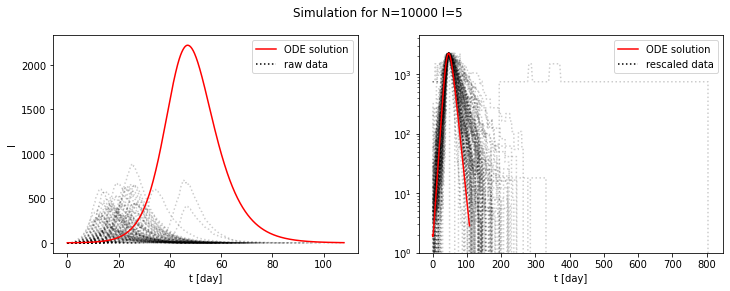

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle("Simulation for N=10000 l=5")
line1 = Line2D([0,1],[0,1], color="r")
line2 = Line2D([0,1],[0,1], linestyle=":", color="k")

I_no_feedback.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[0])
axs[0].plot(t,I, color="r")
axs[0].set_xlabel("t [day]")
axs[0].set_ylabel("I")
axs[0].legend(handles=[line1,line2], labels=["ODE solution", "raw data"])

for col in traslated_no_feedback:
    series = traslated_no_feedback[col].copy()
    series.index = series.index / series.idxmax() * argmax_det
    series.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[1])
    if series.index.max() > 700:
        print(col)
axs[1].plot(t,I, color="r")
axs[1].set_xlabel("t [day]")
axs[1].set_yscale("log")
axs[1].set_ylim([1,max(I)*2])
axs[1].legend(handles=[line1,line2], labels=["ODE solution", "rescaled data"])
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l5.pdf")
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l5.png")

<AxesSubplot:xlabel='t'>

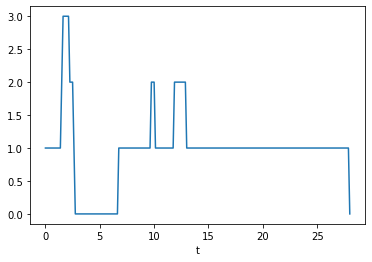

In [56]:
I_no_feedback[3].plot()

In [2]:
data = load_data("bianconi-barabasi_10000_10")

Loading dataset: Completed!


In [3]:
data

run                                  0                             1         \
compartment                           S     E     I     R     D     S     E   
reaction fear     feedback t                                                  
none     none     none     0.000   9999     0     1     0     0  9999     0   
                           0.125   9999     0     1     0     0  9999     0   
                           0.250   9999     0     1     0     0  9999     0   
                           0.375   9999     0     1     0     0  9999     0   
                           0.500   9999     0     1     0     0  9999     0   
...                                 ...   ...   ...   ...   ...   ...   ...   
cut      anticorr all      93.000  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           93.125  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           93.250  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           93.375  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   
                           93.500  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>   

run                                                  ...    98              \
compartment                           I     R     D  ...     S     E     I   
reaction fear     feedback t                         ...                     
none     none     none     0.000      1     0     0  ...  9999     0     1   
                           0.125      1     0     0  ...  9999     0     1   
                           0.250      1     0     0  ...  9999     0     1   
                           0.375      1     0     0  ...  9999     0     1   
                           0.500      1     0     0  ...  9999     0     1   
...                                 ...   ...   ...  ...   ...   ...   ...   
cut      anticorr all      93.000  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           93.125  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           93.250  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           93.375  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   
                           93.500  <NA>  <NA>  <NA>  ...  <NA>  <NA>  <NA>   

run                                              99                          
compartment                           R     D     S     E     I     R     D  
reaction fear     feedback t                                                 
none     none     none     0.000      0     0  9999     0     1     0     0  
                           0.125      0     0  9999     0     1     0     0  
                           0.250      0     0  9999     0     1     0     0  
                           0.375      0     0  9999     0     1     0     0  
                           0.500      0     0  9999     0     1     0     0  
...                                 ...   ...   ...   ...   ...   ...   ...  
cut      anticorr all      93.000  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           93.125  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           93.250  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           93.375  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  
                           93.500  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  

[66868 rows x 500 columns]

In [4]:
I_no_feedback = data.xs(("none","none","none"), level=[0,1,2]).xs("I",axis=1,level="compartment")
I_no_feedback

run,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.125,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.250,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.375,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.500,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
93.125,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
93.250,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [24]:
def SEIR(t, y, beta, mu, gamma):
    dSdt = -beta*y[0]*y[2]
    dEdt = beta*y[0]*y[2] - mu*y[1]
    dIdt = mu*y[1] - gamma*y[2]
    dRdt = gamma*y[2]
    return np.array([dSdt,dEdt,dIdt,dRdt])

y0 = np.array([10000-2,0,2,0]) / 10000
results = solve_ivp(SEIR, (0,I_no_feedback.index.max()), y0, args=(1/2,1/2,1/6), t_eval=I_no_feedback.index)

I = results.y[2] * 10000
t = results.t

In [32]:
series.idxmax()

46.875

In [33]:
list_series = {}
argmax_det = t[np.argmax(I)]
max_det = np.max(I)
for col in I_no_feedback:
    series = I_no_feedback[col].copy()
#    series.index = series.index - series.idxmax() + argmax_det
    series = series / series.max() * max_det
    list_series[col] = series
traslated_no_feedback = pd.concat(list_series, axis=1).sort_index()
traslated_no_feedback

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,3.086092,4.408704,7.285202,17.35927,2.493812,8.10944,6.593432,14.715143,8.22958,4.668039,...,10.999934,11.109933,18.672156,30.026846,17.634814,2.614102,5.63956,4.727631,2.912171,13.466585
0.125,3.086092,4.408704,7.285202,17.35927,2.493812,8.10944,6.593432,14.715143,8.22958,4.668039,...,10.999934,11.109933,18.672156,30.026846,17.634814,2.614102,5.63956,4.727631,2.912171,13.466585
0.250,3.086092,4.408704,7.285202,17.35927,2.493812,8.10944,6.593432,14.715143,8.22958,4.668039,...,10.999934,11.109933,18.672156,30.026846,17.634814,2.614102,5.63956,4.727631,2.912171,13.466585
0.375,3.086092,4.408704,7.285202,17.35927,2.493812,8.10944,6.593432,14.715143,8.22958,4.668039,...,10.999934,11.109933,18.672156,30.026846,17.634814,2.614102,5.63956,4.727631,2.912171,13.466585
0.500,3.086092,4.408704,7.285202,17.35927,2.493812,8.10944,6.593432,14.715143,8.22958,4.668039,...,10.999934,11.109933,18.672156,30.026846,17.634814,2.614102,5.63956,4.727631,2.912171,13.466585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
93.125,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
93.250,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


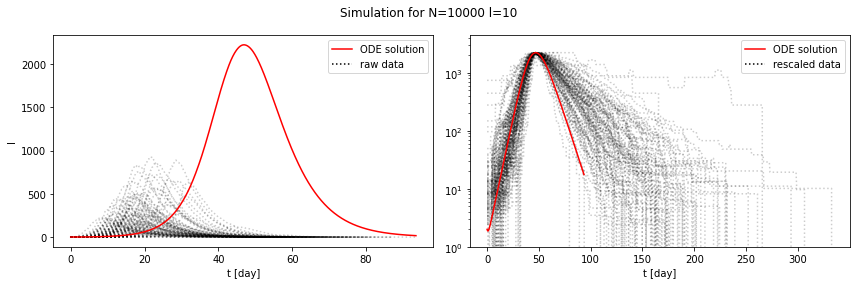

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle("Simulation for N=10000 l=10")
line1 = Line2D([0,1],[0,1], color="r")
line2 = Line2D([0,1],[0,1], linestyle=":", color="k")

I_no_feedback.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[0])
axs[0].plot(t,I, color="r")
axs[0].set_xlabel("t [day]")
axs[0].set_ylabel("I")
axs[0].legend(handles=[line1,line2], labels=["ODE solution", "raw data"])

for col in traslated_no_feedback:
    series = traslated_no_feedback[col].copy()
    series.index = series.index / series.idxmax() * argmax_det
    series.plot(linestyle=":", color="k", alpha=0.2, legend=False, ax=axs[1])
axs[1].plot(t,I, color="r")
axs[1].set_xlabel("t [day]")
axs[1].set_yscale("log")
axs[1].set_ylim([1,max(I)*2])
axs[1].legend(handles=[line1,line2], labels=["ODE solution", "rescaled data"])

fig.tight_layout()
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l10.pdf")
fig.savefig("plots/None/comparison_ODE&simulation_N10000_l10.png")

R0 = 30.0


(0.1, 100000000.0)

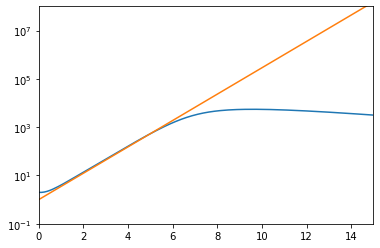

In [14]:
plt.plot(t,I)
plt.yscale("log")
b, s, g = 1/2*10, 1/2, 1/6
lambd = 1/2 * (-s - g + np.sqrt((s - g)**2 + 4 * s * b))
print(f"R0 = {(lambd+s)*(lambd+g)/s/g}")
def f(x):
    return np.exp(lambd * x)
plt.plot(t,f(t))
plt.xlim([0,15])
plt.ylim([1e-1,1e8])